In [2]:
# !pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [4]:
# !pip install numpy --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [6]:
# !pip install mediapipe --upgrade --force-reinstall

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.1 MB/s eta 0:00:00
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.8 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached sounddevice-0.5.1-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import pandas as pd
import os, csv
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.5.3, so it will not be used.
  warnings.warn(


### **1. Data Collection and Dataset Creation from Video**  

The goal is to collect data to analyze and classify the correct standing posture for the **Bicep Curl exercise**. The dataset will be built by extracting key posture data from video recordings.  

There are **two posture classifications**:  
- **Correct posture**: Labeled as **"C"**  
- **Lean-back error**: Labeled as **"L"**  

In [2]:
# Define key landmarks relevant for the plank exercise
IMPORTANT_LMS = [
    "NOSE", "LEFT_SHOULDER", "RIGHT_SHOULDER",
    "RIGHT_ELBOW", "LEFT_ELBOW", "RIGHT_WRIST", "LEFT_WRIST",
    "LEFT_HIP", "RIGHT_HIP"
]

# Generate headers for the DataFrame
HEADERS = ["label"]  # First column stores the class label

# Add (x, y, z, visibility) attributes for each landmark
HEADERS += [f"{lm.lower()}_{coord}" for lm in IMPORTANT_LMS for coord in ["x", "y", "z", "v"]]

# Print headers (for verification)
print(HEADERS)


['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v']


### **1.2. Define Essential Functions**

In [3]:
def rescale_frame(frame: np.ndarray, percent: float = 50) -> np.ndarray:
    """
    Rescale a frame to a specified percentage of its original size.

    Args:
        frame (np.ndarray): The input image frame.
        percent (float): The scale percentage (default is 50%).

    Returns:
        np.ndarray: The resized image frame.
    """
    if frame is None or not isinstance(frame, np.ndarray):
        raise ValueError("Invalid frame: Expected a NumPy array.")

    width = max(1, int(frame.shape[1] * percent / 100))
    height = max(1, int(frame.shape[0] * percent / 100))
    dim = (width, height)

    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)


In [4]:
from pathlib import Path

def init_csv(dataset_path: str) -> None:
    """
    Initialize an empty CSV file with predefined headers.

    Args:
        dataset_path (str): The file path where the CSV will be created.
    """
    dataset_file = Path(dataset_path)

    if dataset_file.exists():
        print(f"CSV file already exists: {dataset_path}")
        return

    with dataset_file.open(mode="w", newline="") as f:
        csv_writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(HEADERS)

    print(f"CSV file created successfully: {dataset_path}")


In [5]:
def export_landmark_to_csv(dataset_path: str, results, action: str) -> None:
    """
    Extracts pose landmarks and saves them into a CSV file.

    Args:
        dataset_path (str): The file path where the landmarks will be saved.
        results: The detected pose landmarks from MediaPipe.
        action (str): The label/class of the action performed.
    """
    if results.pose_landmarks is None:
        print(f"Warning: No landmarks detected for action '{action}'.")
        return

    try:
        landmarks = results.pose_landmarks.landmark
        keypoints = np.array([[landmarks[mp_pose.PoseLandmark[lm].value].x,
                               landmarks[mp_pose.PoseLandmark[lm].value].y,
                               landmarks[mp_pose.PoseLandmark[lm].value].z,
                               landmarks[mp_pose.PoseLandmark[lm].value].visibility]
                              for lm in IMPORTANT_LMS]).flatten()

        row = [action] + keypoints.tolist()

        with open(dataset_path, mode="a", newline="") as f:
            csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL).writerow(row)

    except KeyError as e:
        print(f"Error: Invalid landmark detected - {e}")


In [7]:
def describe_dataset(dataset_path: str) -> pd.DataFrame:
    """
    Provides a summary of the dataset.

    Args:
        dataset_path (str): The file path of the dataset.

    Returns:
        pd.DataFrame: The dataset.
    """
    if not Path(dataset_path).exists():
        raise FileNotFoundError(f"Dataset file not found: {dataset_path}")

    data = pd.read_csv(dataset_path)

    print(f"Headers: {list(data.columns.values)}")
    print(f'Rows: {data.shape[0]}, Columns: {data.shape[1]}\n')
    print(f"Label Distribution:\n{data['label'].value_counts()}\n")
    print(f"Missing Values Present: {data.isnull().values.any()}\n")

    duplicate_count = data.duplicated().sum()
    print(f"Duplicate Rows: {duplicate_count}")

    return data


In [8]:
def remove_duplicate_rows(dataset_path: str, output_path: str = "cleaned_train.csv") -> None:
    """
    Removes duplicate rows from the dataset and saves the cleaned version.

    Args:
        dataset_path (str): The input CSV file path.
        output_path (str): The output CSV file path (default: 'cleaned_train.csv').
    """
    df = pd.read_csv(dataset_path)
    df.drop_duplicates(inplace=True)

    df.to_csv(output_path, index=False)
    print(f"Duplicate rows removed. Cleaned dataset saved to {output_path}.")


In [9]:
def concat_csv_files_with_same_headers(file_paths: list, saved_path: str) -> None:
    """
    Concatenates multiple CSV files with the same headers.

    Args:
        file_paths (list): A list of CSV file paths to merge.
        saved_path (str): The output CSV file path.
    """
    all_df = []

    for path in file_paths:
        if not Path(path).exists():
            print(f"Warning: File not found - {path}")
            continue

        df = pd.read_csv(path, index_col=None, header=0)
        all_df.append(df)

    if not all_df:
        print("No valid CSV files found for merging.")
        return

    results = pd.concat(all_df, axis=0, ignore_index=True)
    results.to_csv(saved_path, index=False)

    print(f"Merged dataset saved to {saved_path}.")


### 2. Retrieve Data from Video

In [10]:
DATASET_PATH = "train.csv"

# Open the video file
cap = cv2.VideoCapture("../data/stand_posture_11.mp4")
save_counts = 0

# Initialize the pose detector
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video or error reading frame.")
            break

        # Resize and flip the frame
        frame = rescale_frame(frame, 60)
        frame = cv2.flip(frame, 1)

        # Convert frame to RGB for MediaPipe processing
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        rgb_frame.flags.writeable = False

        # Process the frame with MediaPipe Pose
        results = pose.process(rgb_frame)

        # Check if a pose is detected
        if not results.pose_landmarks:
            print("No pose detected.")
            continue

        # Convert the frame back to BGR for OpenCV visualization
        rgb_frame.flags.writeable = True
        frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2BGR)

        # Draw pose landmarks
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(244, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

        # Display the count of saved frames
        cv2.putText(frame, f"Saved: {save_counts}", (50, 50),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow("Pose Detection", frame)

        # Capture user input
        key = cv2.waitKey(1) & 0xFF

        # Save correct form ('C') or incorrect form ('L')
        if key == ord('c'):
            export_landmark_to_csv(DATASET_PATH, results, "C")
            save_counts += 1
            print("Saved: Correct (C)")

        elif key == ord('l'):
            export_landmark_to_csv(DATASET_PATH, results, "L")
            save_counts += 1
            print("Saved: Lean-back error (L)")

        elif key == ord('q'):
            print("Exiting program...")
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

    # Extra wait to ensure clean shutdown (MacOS fix)
    for _ in range(5):
        cv2.waitKey(1)


In [17]:
df=pd.read_csv("train.csv")

In [18]:
df.head()

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,left_wrist_z,left_wrist_v,left_hip_x,left_hip_y,left_hip_z,left_hip_v,right_hip_x,right_hip_y,right_hip_z,right_hip_v
0,C,0.414257,0.217722,0.040372,0.999799,0.491718,0.242290,-0.102657,0.999969,0.449930,...,0.017443,0.983423,0.494150,0.592285,-0.091829,0.996242,0.463868,0.593338,0.092086,0.990673
1,C,0.408304,0.200914,-0.090559,0.999532,0.465515,0.277588,-0.278182,0.999963,0.474255,...,-0.266732,0.991456,0.524632,0.599458,-0.116790,0.984383,0.537771,0.593787,0.116950,0.966556
2,L,0.518864,0.265383,-0.025652,0.997683,0.549352,0.349290,-0.169876,0.999727,0.536604,...,-0.019170,0.794638,0.457984,0.600586,-0.081877,0.997329,0.449206,0.587106,0.082066,0.996056
3,C,0.495288,0.166820,-0.317633,0.999989,0.552635,0.299057,-0.080742,0.999983,0.422907,...,-0.135975,0.983631,0.528388,0.625043,0.007509,0.998355,0.442835,0.618160,-0.007266,0.997456
4,L,0.517343,0.263782,-0.082595,0.992293,0.576584,0.352237,-0.266217,0.999939,0.571404,...,-0.271048,0.986656,0.535921,0.669715,-0.117597,0.991432,0.534404,0.662375,0.117520,0.982049


Headers: ['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v']
Rows: 15372, Columns: 37

Label Distribution:
label
C    8238
L    7134
Name: count, dtype: int64

Missing Values Present: False

Duplicate Rows: 0


<Axes: xlabel='label', ylabel='count'>

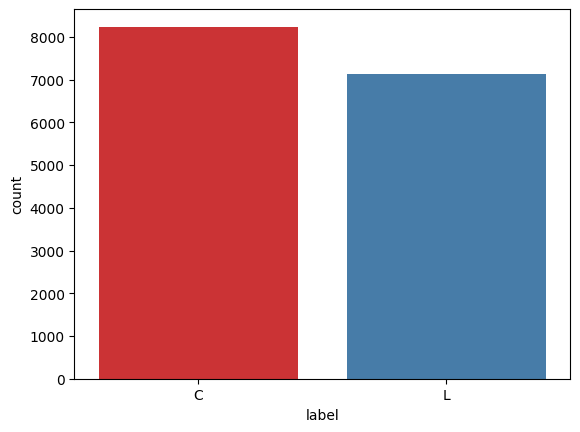

In [19]:
df = describe_dataset("./train.csv")
sns.countplot(x='label', data=df, palette="Set1")

In [20]:
import cv2
import mediapipe as mp
import os

# Define paths
TEST_DATASET_PATH = "test.csv"
video_path = "../data/test_2.mp4"  # Make it dynamic

# Initialize pose detection
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Open video file
cap = cv2.VideoCapture(video_path)
save_counts = 0

# Initialize CSV file
init_csv(TEST_DATASET_PATH)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video or cannot read frame")
            break

        # Preprocess frame
        frame = rescale_frame(frame, 60)
        frame = cv2.flip(frame, 1)  # Flip horizontally for consistency
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process pose landmarks
        frame_rgb.flags.writeable = False
        results = pose.process(frame_rgb)

        if not results.pose_landmarks:
            print("Cannot detect pose - No human found")
            continue  # Skip to next frame

        # Convert image back to BGR for display
        frame_rgb.flags.writeable = True
        frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

        # Draw landmarks
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(244, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

        # Display saved count
        cv2.putText(frame, f"Saved: {save_counts}", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 0), 2, cv2.LINE_AA)

        # Show the video frame
        cv2.imshow("Pose Detection", frame)

        # Capture user input
        key = cv2.waitKey(1) & 0xFF

        # Save data based on keypress
        if key == ord('c'):
            export_landmark_to_csv(TEST_DATASET_PATH, results, "C")
            save_counts += 1
        elif key == ord('l'):
            export_landmark_to_csv(TEST_DATASET_PATH, results, "L")
            save_counts += 1
        elif key == ord('q'):  # Quit
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

    # Fix macOS window closing issue
    for _ in range(5):
        cv2.waitKey(1)


CSV file created successfully: test.csv


Headers: ['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v']
Rows: 604, Columns: 37

Label Distribution:
label
C    339
L    265
Name: count, dtype: int64

Missing Values Present: False

Duplicate Rows: 0


<Axes: xlabel='label', ylabel='count'>

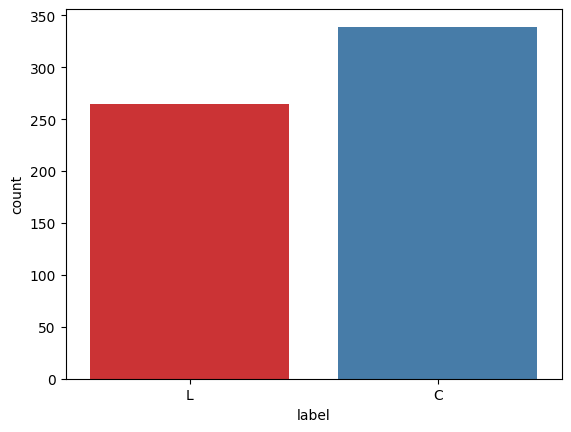

In [22]:
df = describe_dataset("./test.csv")
sns.countplot(x='label', data=df, palette="Set1")